#**Intro**
This dataset is produced after taking several surveys with the airline customers who have travelled with this airline.Several factors or feedbacks are taken from customers and also their demographic data is recorded as well.

#**Attribute Details**


1. **Satisfaction**-This is the column that indicate if the customer is satisfied or not with the overall airline service
2. **Gender**-Detail about the gender of customer
3. **Customer Type**-Indicates if a customer is loyal or not .i.e if the customer prefer the same airline in future travels or not
4. **Age**-Displays the age of customers which is mainly between 7 to 85
5.**Type of Travel**-Indicates if the customer has travelled for personal or business purpose
6.**Class**-Type of class that person travelled in:Business/Economy/Others
7.**Flight Distance**-It is total distance of travel from source to destination
8.**Seat comfort**-Rating given by customer from 0 to 5 on the basis of seat comfort
9.**Departure/Arrival time convenient**-This indicates if the stating or arrival time is convenient for customer on the rating of 0-5
10.**Food & Drink**- Rating on 0-5 if customers were satisfied with the food
11.**Gate Location**-Rating from 0-5
12.**Inflight Wifi Service**-Rating from 0-5
13.**Inflight Entertainment**-Rating from 0-5
14.**Online Support**-Rating from 0-5
15.**Ease of Online booking**-Rating from 0-5
16.**Onboard Service**-Rating from 0-5
17.**Legroom Service**-Rating from 0-5
18.**Baggage Handling**-Rating from 0-5
19.**Checkin Service**-Rating from 0-5
20.**Cleanliness**-Rating from 0-5
21.**Online Boarding**-Rating from 0-5
22.**Departure Delay in minutes**-Rating from 0-5
23.**Arrival Delay in minutes**-Rating from 0-5

#**importing library modules**

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


#**loading dataset to pandas environment**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###**loading .csv file into a pandas dataframe**

In [3]:
dataset=pd.read_csv('/content/drive/MyDrive/DSA_B5_Team_7/Airline.csv')

In [4]:
dataset.head(5)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

This dataset contain 129880 records and 23 columns

Here we can see a column'Satisfaction': this is our target column, our main objective of this study based on this column. Hence we can say that this is a classification problem

#**Features Analysis**

In [6]:
dataset.dtypes

satisfaction                          object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival De

In [7]:
dataset.dtypes.value_counts()

int64      17
object      5
float64     1
dtype: int64

In this dataset there is a mix of different datatypes. such as object,int64 & float64.

categorical Features: satisfaction,Gender,Customer Type, Type of Travel, Class

Numerical Features : Age, Flight Distance, Seat comfort, Departure/Arrival time convenient, Food and drink, Gate location, Inflight wifi service, Inflight entertainment, Online support, Ease of Online booking, On-board service, Leg room service, Baggage handling, Checkin service, Cleanliness, Online boarding, Departure Delay in Minutes, Arrival Delay in Minutes.

Out of this entire features,14 are ratings given by customers on the scale of 0-5

#**Descriptive Statistics**

The .describe() method will give you the statistics of the columns.

Here is the output:

In [8]:
dataset.describe(include='all')

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880,129880,129880,129880.000000,129880,129880,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
unique,2,2,2,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,satisfied,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,71087,65899,106100,NaN,89693,62160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,39.427957,NaN,NaN,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,NaN,NaN,NaN,15.119360,NaN,NaN,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,NaN,NaN,NaN,7.000000,NaN,NaN,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,27.000000,NaN,NaN,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,NaN,NaN,NaN,40.000000,NaN,NaN,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,NaN,NaN,NaN,51.000000,NaN,NaN,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000


Descriptive statistics from the dataset shows the entire summary of each features.Inshort,we can say most of the customers are satisfied with their overall experience with the airline and majority of them are females and loyal customers.Most of them travelled for business purposes and preferred business class

#**Missing Value identification**

In [9]:
dataset.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

From the above details,we can see that 393 null values are present in the dataset and its on the feature:'Arrival delay in minutes'

###**checking for any duplicate values**

In [10]:
dataset.duplicated().sum()

0

We can see no duplicate values present in this data

#**Unique value in each categorical columns**

In [11]:
#This gives the columns that are categorical
dataset.select_dtypes('object').columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class'], dtype='object')

In [12]:
#printing all categorical columns with uniques values in them
for columns in dataset.select_dtypes('object').columns:        # loop for filtering categorical columns
 print('column name            :',columns,'\n',
        'Number of Unique Value: ',dataset[columns].nunique(),'\n',
        'Unique Values         :',dataset[columns].unique(),'\n','\n')

column name            : satisfaction 
 Number of Unique Value:  2 
 Unique Values         : ['satisfied' 'dissatisfied'] 
 

column name            : Gender 
 Number of Unique Value:  2 
 Unique Values         : ['Female' 'Male'] 
 

column name            : Customer Type 
 Number of Unique Value:  2 
 Unique Values         : ['Loyal Customer' 'disloyal Customer'] 
 

column name            : Type of Travel 
 Number of Unique Value:  2 
 Unique Values         : ['Personal Travel' 'Business travel'] 
 

column name            : Class 
 Number of Unique Value:  3 
 Unique Values         : ['Eco' 'Business' 'Eco Plus'] 
 



####**Count of each unique values in each categorical features**

In [13]:
for i in dataset.select_dtypes('object').columns:                  # loop for filtering categorical columns
  print(dataset[[i]].groupby(i).size(),'\n'+'------------------','\n')  # printing all categorical columns with uniques values count

satisfaction
dissatisfied    58793
satisfied       71087
dtype: int64 
------------------ 

Gender
Female    65899
Male      63981
dtype: int64 
------------------ 

Customer Type
Loyal Customer       106100
disloyal Customer     23780
dtype: int64 
------------------ 

Type of Travel
Business travel    89693
Personal Travel    40187
dtype: int64 
------------------ 

Class
Business    62160
Eco         58309
Eco Plus     9411
dtype: int64 
------------------ 



#**Univariate Analysis & Bi-Variate Analysis**

###**No.of Satisfied & Dissatisfied customers**

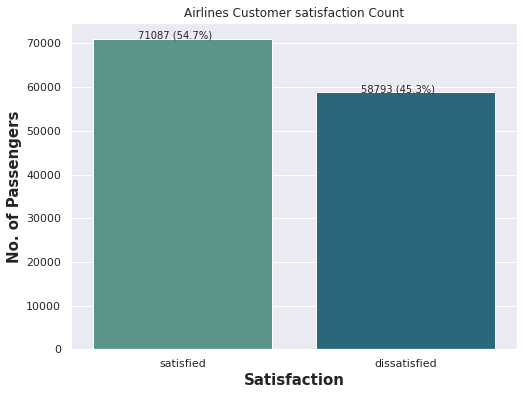

In [14]:
fig=plt.figure(figsize=(8,6))  
ax=sns.countplot(x="satisfaction", data=dataset,palette='crest')
for p in ax.patches:
  ax.annotate(str(p.get_height())+' ('+str((p.get_height()/len(dataset)*100).round(1))+'%)',(p.get_x()+0.2, p.get_height()))
plt.title('Airlines Customer satisfaction Count')
plt.xlabel('Satisfaction',weight='bold',fontsize='15')   
plt.ylabel('No. of Passengers',weight='bold',fontsize='15')   
plt.show()

**Observations**

This graph shows that 54.7% of travellers are satisfied and the rest are not satisfied.

**Inference**

From this observation,the majority of passengers are satisfied with their overall experience with the airline.

**Conclusion**

This indicates ,it is a balanced dataset as the distribution of both satisfied and dissatisfied customers falls in same range


###**No.of passengers based on Gender**

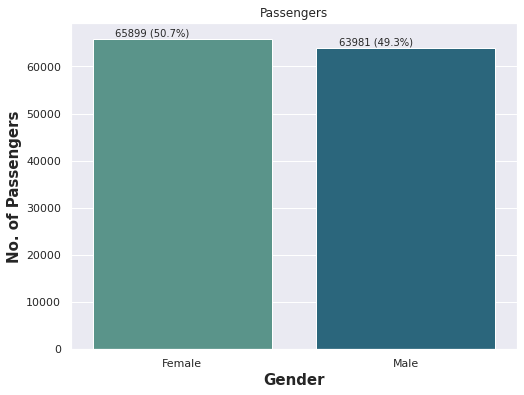

In [15]:
fig=plt.figure(figsize=(8,6))
ax=sns.countplot(x="Gender", data=dataset,palette='crest')
for p in ax.patches:
  ax.annotate(str(p.get_height())+' ('+str((p.get_height()/len(dataset)*100).round(1))+'%)', (p.get_x()+0.1, p.get_height()+400))
plt.title('Passengers')
plt.xlabel('Gender',weight='bold',fontsize='15')
plt.ylabel('No. of Passengers',weight='bold',fontsize='15')
plt.show()

**Observations**

This graph shows that the 50.7% are female passengers

**Inference**

From this observation,the no.of male and female passengers are almost equal



###**No.of passengers based on Customer Type**

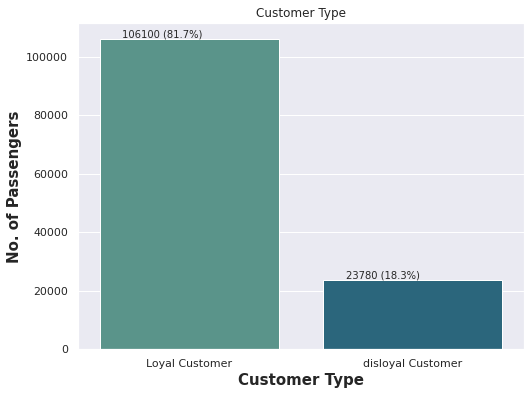

In [16]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x="Customer Type", data=dataset,palette='crest')
for p in ax.patches:
  ax.annotate(str(p.get_height())+' ('+str((p.get_height()/len(dataset)*100).round(1))+'%)', (p.get_x()+0.1, p.get_height()+400))
plt.title('Customer Type')
plt.xlabel('Customer Type',weight='bold',fontsize='15')
plt.ylabel('No. of Passengers',weight='bold',fontsize='15')
plt.show()

**Observations**

This graph shows that the 81.7% are loyal customers

**Inference**

From this observation,the majority of customers are loyal

**Conclusion**

Since most of the customers are loyal,this may indicate that most of the customers are frequent travellers with this airline.

###**No.of Passengers based on type of travel**

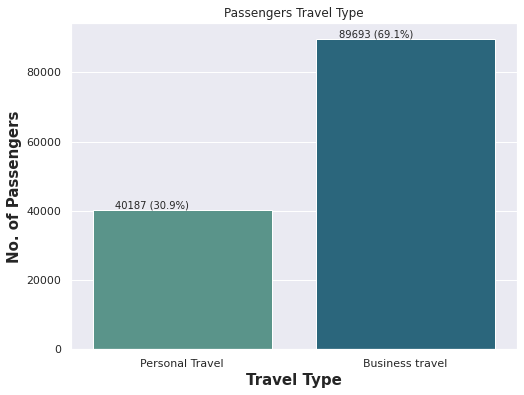

In [17]:
fig=plt.figure(figsize=(8,6))
ax=sns.countplot(x="Type of Travel", data=dataset,palette="crest")
for p in ax.patches:
  ax.annotate(str(p.get_height())+' ('+str((p.get_height()/len(dataset)*100).round(1))+'%)', (p.get_x()+0.1, p.get_height()+400))
plt.title('Passengers Travel Type')
plt.xlabel('Travel Type',weight='bold',fontsize='15')
plt.ylabel('No. of Passengers',weight='bold',fontsize='15')
plt.show()

**Observations**

This graph shows that the 69.1% of passengers travelled for business purposes

**Inference**

From this observation,the majority of customers are business travellers

**Conclusion**

Since most of the passengers are choosing this airline for business travels,if we offer any discounts for them,their preference for our airline will be more.And we have to figure out why the customer's selection of our airline is less for personal travel and for that we need more insights

###**No.of passengers based on class of travel**

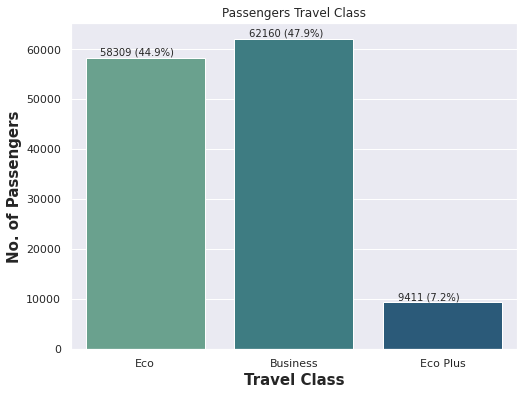

In [169]:
fig=plt.figure(figsize=(8,6))
ax=sns.countplot(x="Class", data=dataset,palette="crest")
for p in ax.patches:
  ax.annotate(str(p.get_height())+' ('+str((p.get_height()/len(dataset)*100).round(1))+'%)', (p.get_x()+0.1, p.get_height()+400))
plt.title('Passengers Travel Class')
plt.xlabel('Travel Class',weight='bold',fontsize='15')
plt.ylabel('No. of Passengers',weight='bold',fontsize='15')
plt.show()

**Observations**

This graph shows that there are three types of classes and most of the travellers has chosen economical class

**Inference**

Both economy and business class travellers are almost equal whereas the customers who has chosen economical plus is very few

**Conclusion**

As this graph clearly shows the economical plus class is not choosen by most of customers and it can be due to high price compared to economy and less quality and service compared to price they pay.It is better to keep both economy and eco plus as a single class.

###**No.of Satisfied customers on the basis of Gender**

In [19]:
df1=dataset.copy()

In [20]:
df2=df1[['satisfaction','Gender']]

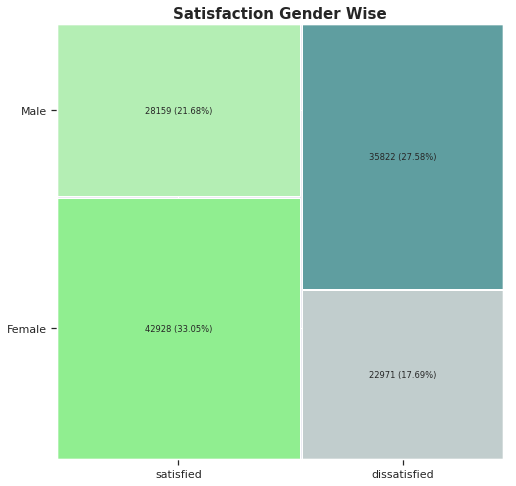

In [168]:
from statsmodels.graphics.mosaicplot import mosaic

props={}
props[('satisfied','Female')]={'facecolor':'lightgreen', 'edgecolor':'white'}
props[('dissatisfied','Female')]={'facecolor':'#C1CDCD', 'edgecolor':'white'}
props[('satisfied','Male')]={'facecolor':'#B4EEB4','edgecolor':'white'}
props[('dissatisfied','Male')]={'facecolor':'#5F9EA0','edgecolor':'white'}
labelizer=lambda k:{('satisfied','Female'):str(len(df2[(df2["satisfaction"] == "satisfied") & (df2["Gender"] == "Female")]))+
                    ' ('+str(round((len(df2[(df2["satisfaction"] == "satisfied") & (df2["Gender"] == "Female")])/len(dataset)*100),2))+'%)',
                    ('dissatisfied','Female'):str(len(df2[(df2["satisfaction"] == "dissatisfied") & (df2["Gender"] == "Female")]))+
                    ' ('+str(round((len(df2[(df2["satisfaction"] == "dissatisfied") & (df2["Gender"] == "Female")])/len(dataset)*100),2))+'%)',
                    ('satisfied','Male'):str(len(df2[(df2["satisfaction"] == "satisfied") & (df2["Gender"] == "Male")]))+
                    ' ('+str(round((len(df2[(df2["satisfaction"] == "satisfied") & (df2["Gender"] == "Male")])/len(dataset)*100),2))+'%)',
                    ('dissatisfied','Male'):str(len(df2[(df2["satisfaction"] == "dissatisfied") & (df2["Gender"] == "Male")]))+
                    ' ('+str(round((len(df2[(df2["satisfaction"] == "dissatisfied") & (df2["Gender"] == "Male")])/len(dataset)*100),2))+'%)'}[k]

mc=mosaic(data=dataset, index=['satisfaction', 'Gender'],labelizer=labelizer,properties=props)
plt.rcParams["figure.figsize"]=(8,8)
plt.title('Satisfaction Gender Wise',weight='bold',fontsize='15')
plt.show()

**observation**

In this figure we can see that satisfied Female passengers are 33.1% and dissatisfied female passengers are 17.7%

**Inferences**

Among the passengers, majority of the satisfied cutomers are Females. Her we can see that Male passengers are dissatisfied with this airline services.

Further investigations are required to figure out the reasons of dissatisfaction among the male passengers


###**No.of Customers Type on the basis of Gender**

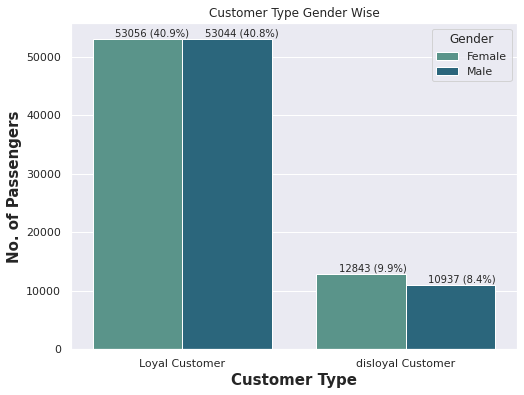

In [27]:
fig=plt.figure(figsize=(8,6))
ax=sns.countplot(x="Customer Type",hue="Gender",data=dataset,palette="crest")
for p in ax.patches:
  ax.annotate(str(p.get_height())+' ('+str((p.get_height()/len(dataset)*100).round(1))+'%)', (p.get_x()+0.1, p.get_height()+400))
plt.title('Customer Type Gender Wise')
plt.xlabel('Customer Type',weight='bold',fontsize='15')   
plt.ylabel('No. of Passengers',weight='bold',fontsize='15')   
plt.show()

**observation**

In this figure we can see that , 80% of passengers both Female & male are Loyal to this airline

**Inferences**

Among the passengers,there is a chance that this Loyal Customer are frequent trvellers with this airline. And the disloyal customers may be the first time traveller by this airline or disatisfied customers 


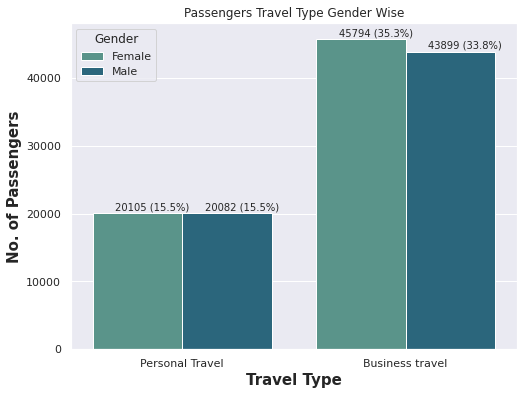

In [28]:
fig=plt.figure(figsize=(8,6))
ax=sns.countplot(x="Type of Travel",hue="Gender", data=dataset,palette="crest")
for p in ax.patches:
  ax.annotate(str(p.get_height())+' ('+str((p.get_height()/len(dataset)*100).round(1))+'%)', (p.get_x()+0.1, p.get_height()+400))
plt.title('Passengers Travel Type Gender Wise')
plt.xlabel('Travel Type',weight='bold',fontsize='15')
plt.ylabel('No. of Passengers',weight='bold',fontsize='15')
plt.show()

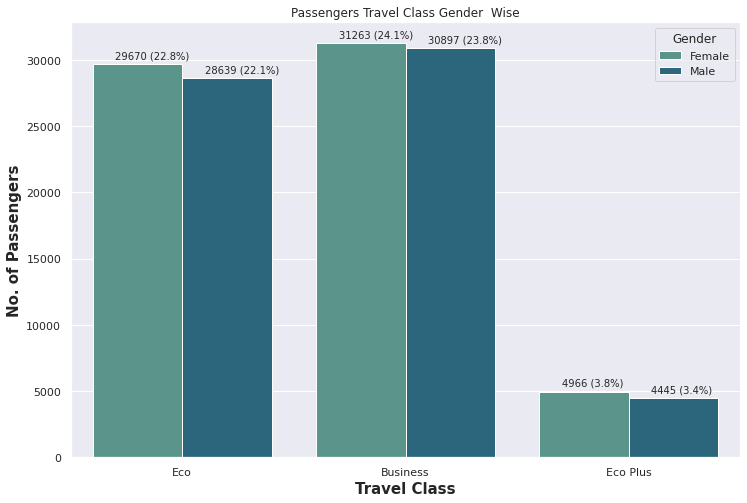

In [30]:
fig=plt.figure(figsize=(12,8))
ax=sns.countplot(x="Class",hue="Gender",data=dataset,palette="crest")
for p in ax.patches:
  ax.annotate(str(p.get_height())+' ('+str((p.get_height()/len(dataset)*100).round(1))+'%)', (p.get_x()+0.1, p.get_height()+400))
plt.title('Passengers Travel Class Gender  Wise')
plt.xlabel('Travel Class',weight='bold',fontsize='15')
plt.ylabel('No. of Passengers',weight='bold',fontsize='15')
plt.show()

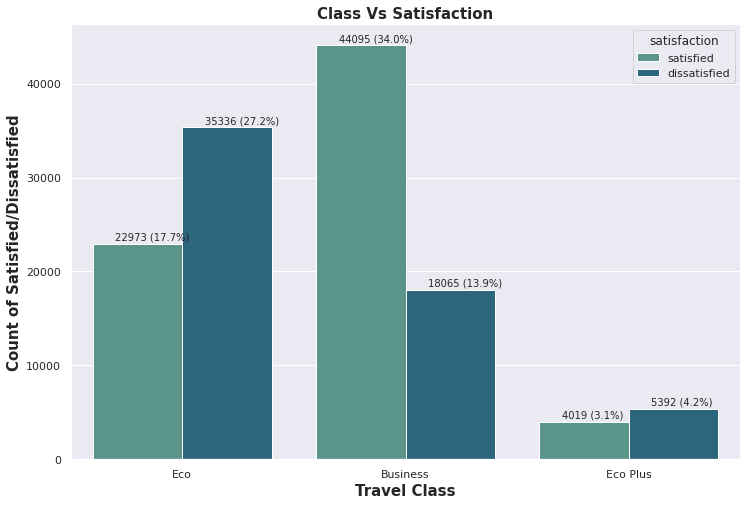

In [171]:
fig=plt.figure(figsize=(12,8))
ax=sns.countplot(x="Class",hue="satisfaction",data=dataset,palette="crest")
for p in ax.patches:
  ax.annotate(str(p.get_height())+' ('+str((p.get_height()/len(dataset)*100).round(1))+'%)', (p.get_x()+0.1, p.get_height()+400))
plt.title('Class Vs Satisfaction',weight='bold',fontsize='15')
plt.xlabel('Travel Class',weight='bold',fontsize='15')
plt.ylabel('Count of Satisfied/Dissatisfied',weight='bold',fontsize='15')
plt.show()

In [174]:
df2[df2["satisfaction"] == "satisfied"]

,satisfaction,Gender
0,satisfied,Female
1,satisfied,Male
2,satisfied,Female
3,satisfied,Female
4,satisfied,Female
...,...,...
129871,satisfied,Female
129872,satisfied,Female
129873,satisfied,Female
129874,satisfied,Female


<Figure size 576x432 with 0 Axes>

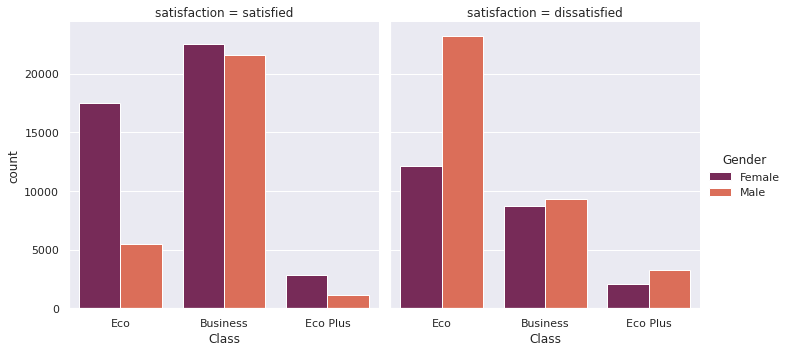

In [179]:
fig=plt.figure(figsize=(8,6))
ax=sns.catplot(x="Class",col="satisfaction",hue="Gender",data=dataset,kind="count",palette="rocket")
plt.show()

In [90]:
dff=dataset[['satisfaction','Seat comfort']]

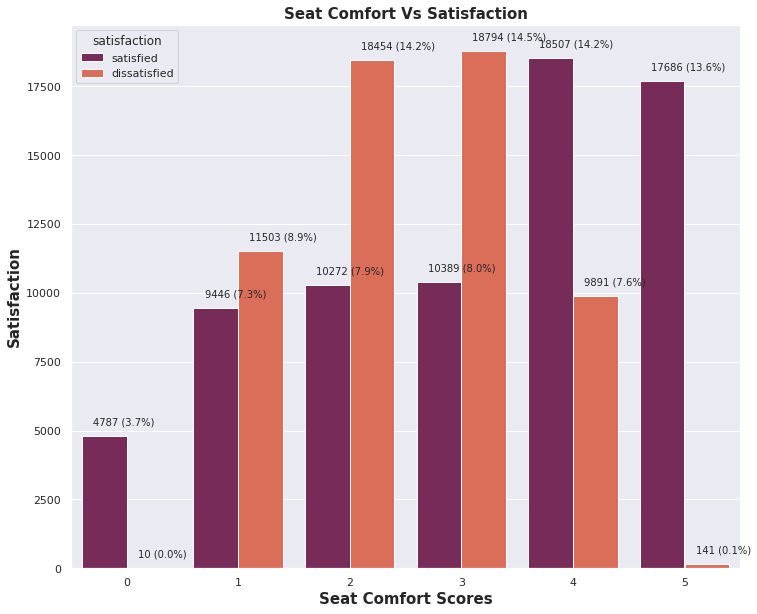

In [101]:
fig=plt.figure(figsize=(12,10))
ax=sns.countplot(x="Seat comfort",hue="satisfaction",data=dff,palette="rocket")
for p in ax.patches:
  ax.annotate(str(p.get_height())+' ('+str((p.get_height()/len(dataset)*100).round(1))+'%)', (p.get_x()+0.1, p.get_height()+400))
plt.title('Seat Comfort Vs Satisfaction',weight='bold',fontsize='15')
plt.xlabel('Seat Comfort Scores',weight='bold',fontsize='15')
plt.ylabel('Satisfaction',weight='bold',fontsize='15')
plt.show()

In [118]:
from joypy import joyplot

<Figure size 576x576 with 0 Axes>

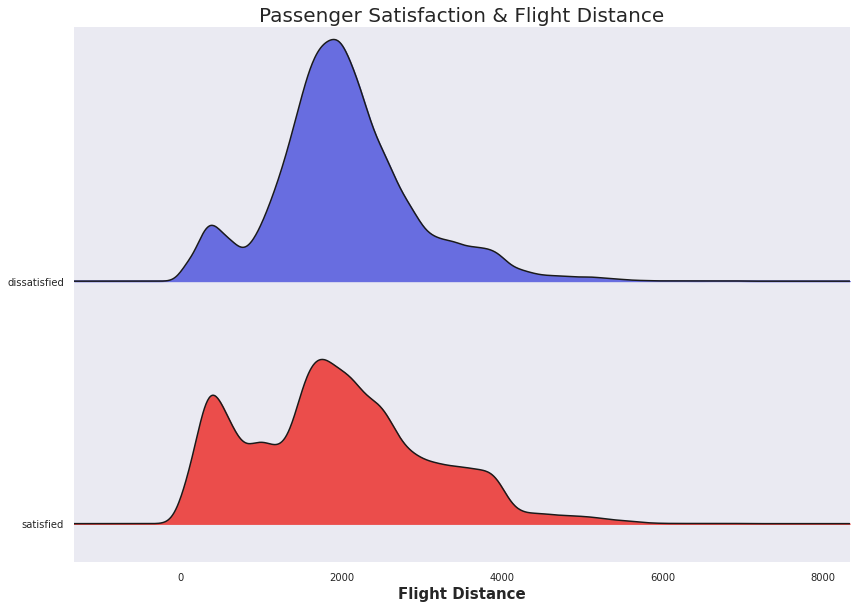

In [127]:
plt.figure()

joyplot(data=dataset[['satisfaction', 'Flight Distance']], by='satisfaction',color=['#686de0', '#eb4d4b'],figsize=(12, 8))
plt.title('Passenger Satisfaction & Flight Distance', fontsize=20)
plt.xlabel('Flight Distance',weight='bold',fontsize='15')
plt.show()

###**inFlight Entertinement Vs Satisfaction**

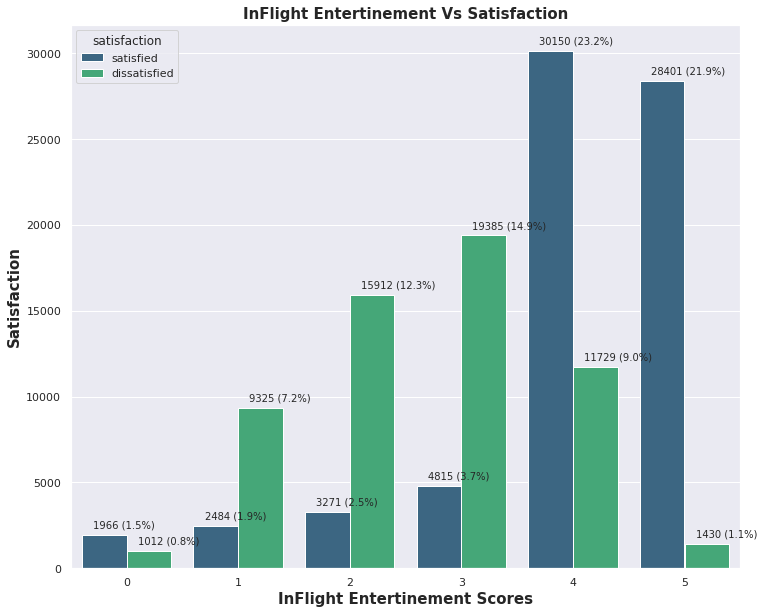

In [133]:
fig=plt.figure(figsize=(12,10))
ax=sns.countplot(x="Inflight entertainment",hue="satisfaction",data=dataset,palette="viridis")
for p in ax.patches:
  ax.annotate(str(p.get_height())+' ('+str((p.get_height()/len(dataset)*100).round(1))+'%)', (p.get_x()+0.1, p.get_height()+400))
plt.title('InFlight Entertinement Vs Satisfaction',weight='bold',fontsize='15')
plt.xlabel('InFlight Entertinement Scores',weight='bold',fontsize='15')
plt.ylabel('Satisfaction',weight='bold',fontsize='15')
plt.show()

###**Cleanliness Vs Satisfation**

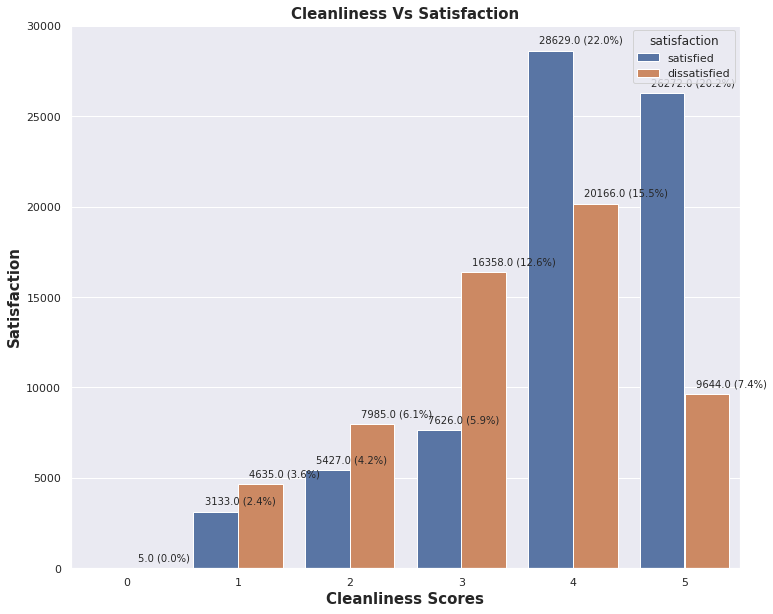

In [138]:
fig=plt.figure(figsize=(12,10))
ax=sns.countplot(x="Cleanliness",hue="satisfaction",data=dataset)
for p in ax.patches:
  ax.annotate(str(p.get_height())+' ('+str((p.get_height()/len(dataset)*100).round(1))+'%)', (p.get_x()+0.1, p.get_height()+400))
plt.title('Cleanliness Vs Satisfaction',weight='bold',fontsize='15')
plt.xlabel('Cleanliness Scores',weight='bold',fontsize='15')
plt.ylabel('Satisfaction',weight='bold',fontsize='15')
plt.show()

In [144]:
dt = dataset.copy()# copying the original dataset to a new dataset
dt = dt.drop([column for column in dt.select_dtypes('object').columns],axis=1)#droping the categorical columns from the dataset

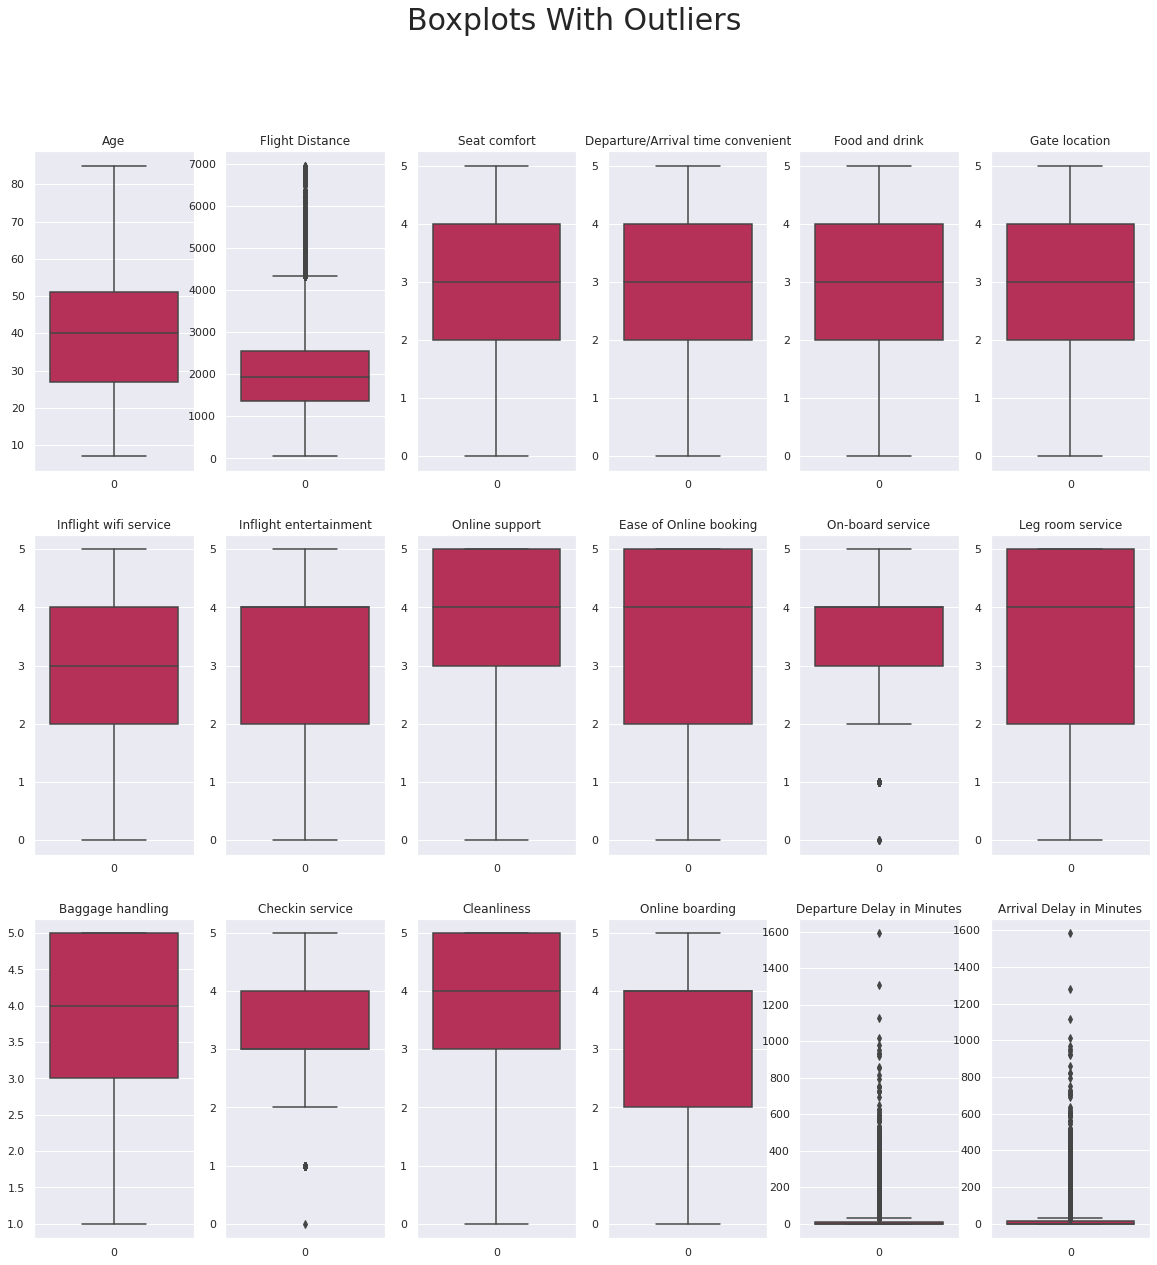

In [146]:
plt.figure(figsize=(20, 20))# setting the plot area

for i, column in enumerate(dt):
    plt.subplot(3, 6, i + 1)# setting the subplot for each columns in 3 rows and 6 columns
    sns.boxplot(data=dt[column],palette="rocket")
    plt.title(column)

plt.suptitle("Boxplots With Outliers", size=30)
plt.show()